In [2]:
from pathlib import Path
import sys

sys.path.append(str(Path('').absolute().parent))


from stable_baselines3 import DQN
from stable_baselines3.dqn import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env

from gym_snake.envs.SnakeEnv import SnakeEnv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import random
random.seed(42)

In [3]:
def plot_metrics(metrics, filepath=None):
    formatted_dict = {'episodes': [],
                      'metrics': [],
                      'results': []}

    n = len(metrics['score'])
    for i in range(n):        
        score = metrics['score'][i]
        reward = metrics['reward'][i]

        formatted_dict['episodes'].append(i)
        formatted_dict['metrics'].append('score')
        formatted_dict['results'].append(score)

        formatted_dict['episodes'].append(i)
        formatted_dict['metrics'].append('reward')
        formatted_dict['results'].append(reward)

    df_metrics = pd.DataFrame(formatted_dict)
    sns.lineplot(data=df_metrics, x='episodes', y='results', hue='metrics')
    if filepath is None:
        plt.show()
    else:
        plt.savefig(filepath)
        
def evaluate(model):
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)
    obs = env.reset()

    for _ in range(10000):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        env.render()

    return snake_env.record, np.mean(np.array(snake_env.results['score']))

### Testando: exploration_fraction

In [7]:
results = {}
for f in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)
    
    model = DQN(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, exploration_fraction=f/10, learning_starts=1)
    model.learn(total_timesteps=80000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[f/10] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)

Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 106      |
|    ep_rew_mean      | -6.1     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1000     |
|    fps              | 307      |
|    time_elapsed     | 253      |
|    total timesteps  | 78002    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.589    |
|    n_updates        | 19500    |
----------------------------------
Using cpu device
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 108      |
|    ep_rew_mean      | -5.9     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1000     |
|    fps              | 310      |
|    time_elapsed     | 231      |
|    to

Exploration Factor 0.0


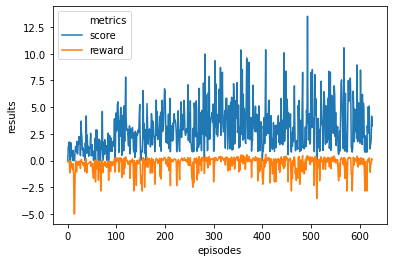

Max Train Score 30 Max Test Score 6
Mean Train Score 3.0004289729092477 Mean Test Score 1.501285801452186
----------------------------------------------------------------------------------------------------
Exploration Factor 0.1


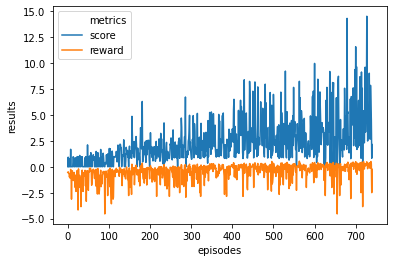

Max Train Score 27 Max Test Score 26
Mean Train Score 2.3768990592847152 Mean Test Score 4.870592244323073
----------------------------------------------------------------------------------------------------
Exploration Factor 0.2


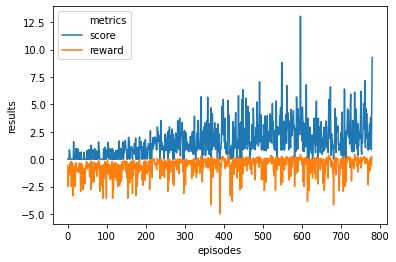

Max Train Score 23 Max Test Score 15
Mean Train Score 1.6520527376996659 Mean Test Score 2.8271817230339136
----------------------------------------------------------------------------------------------------
Exploration Factor 0.3


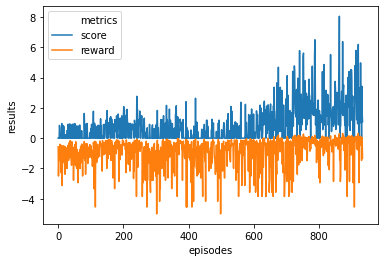

Max Train Score 14 Max Test Score 7
Mean Train Score 0.8754297008550448 Mean Test Score 2.271613709848398
----------------------------------------------------------------------------------------------------
Exploration Factor 0.4


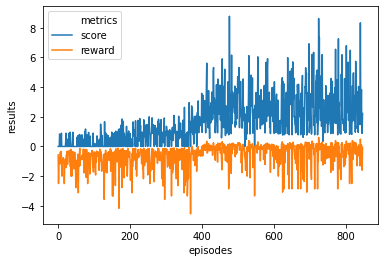

Max Train Score 16 Max Test Score 7
Mean Train Score 1.6716434508069296 Mean Test Score 1.3611518902392252
----------------------------------------------------------------------------------------------------
Exploration Factor 0.5


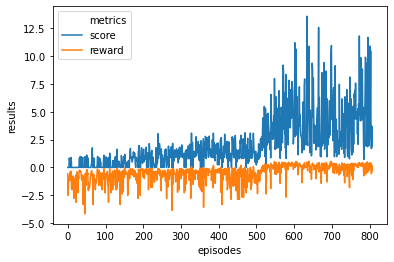

Max Train Score 25 Max Test Score 32
Mean Train Score 2.154960923776156 Mean Test Score 5.587711700790663
----------------------------------------------------------------------------------------------------
Exploration Factor 0.6


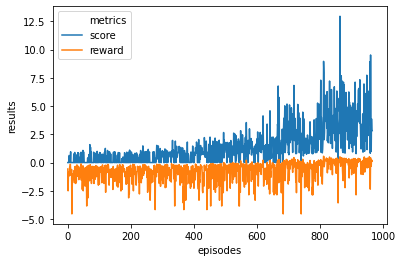

Max Train Score 23 Max Test Score 21
Mean Train Score 1.4248960992046882 Mean Test Score 5.202545434380972
----------------------------------------------------------------------------------------------------
Exploration Factor 0.7


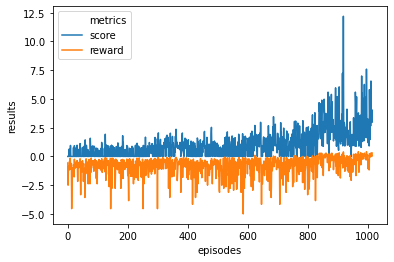

Max Train Score 20 Max Test Score 16
Mean Train Score 1.0620373342579732 Mean Test Score 3.2018813285441294
----------------------------------------------------------------------------------------------------
Exploration Factor 0.8


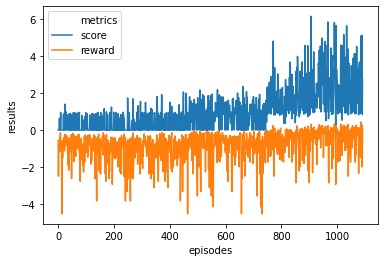

Max Train Score 11 Max Test Score 16
Mean Train Score 1.013312474084618 Mean Test Score 3.5342220172436534
----------------------------------------------------------------------------------------------------
Exploration Factor 0.9


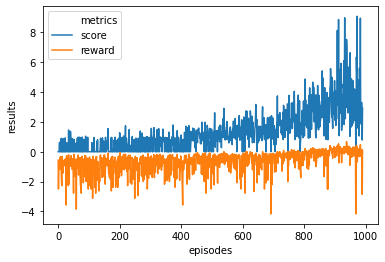

Max Train Score 20 Max Test Score 17
Mean Train Score 1.3241203797554304 Mean Test Score 3.20158692476195
----------------------------------------------------------------------------------------------------


In [8]:
for exp_factor, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Exploration Factor", exp_factor)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

### Testando learning rate

In [9]:
results = {}
lrates = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
for lr in lrates:
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)
    
    model = DQN(MlpPolicy, env, verbose=1, learning_rate=lr, seed=42, learning_starts=1)
    model.learn(total_timesteps=80000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[lr] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)

Using cpu device
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.2     |
|    ep_rew_mean      | -47.7    |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1000     |
|    fps              | 418      |
|    time_elapsed     | 143      |
|    total timesteps  | 60106    |
| train/              |          |
|    learning_rate    | 1        |
|    loss             | 0.00815  |
|    n_updates        | 15026    |
----------------------------------
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device


Learning Rate 1


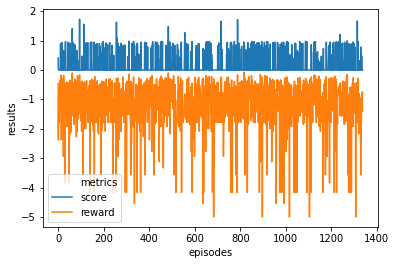

Max Train Score 2 Max Test Score 1
Mean Train Score 0.1807996356488006 Mean Test Score 0.06801195814648729
----------------------------------------------------------------------------------------------------
Learning Rate 0.1


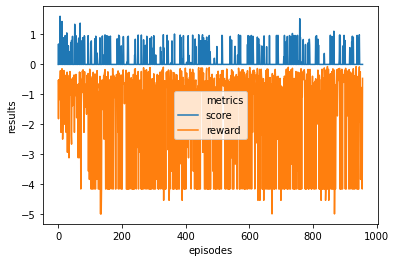

Max Train Score 3 Max Test Score 1
Mean Train Score 0.14422853377994144 Mean Test Score 0.013796678808756102
----------------------------------------------------------------------------------------------------
Learning Rate 0.01


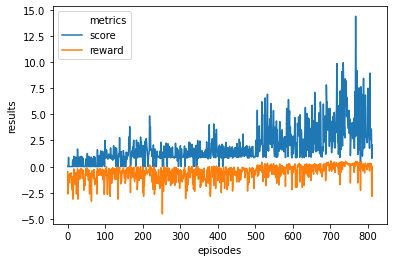

Max Train Score 27 Max Test Score 14
Mean Train Score 1.9358527793806013 Mean Test Score 3.071133321961845
----------------------------------------------------------------------------------------------------
Learning Rate 0.001


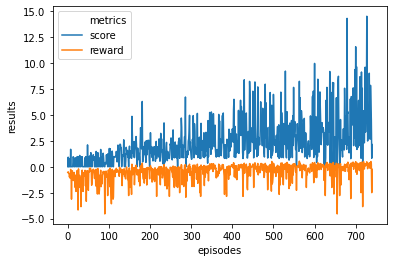

Max Train Score 27 Max Test Score 26
Mean Train Score 2.3768990592847152 Mean Test Score 4.870592244323073
----------------------------------------------------------------------------------------------------
Learning Rate 0.0001


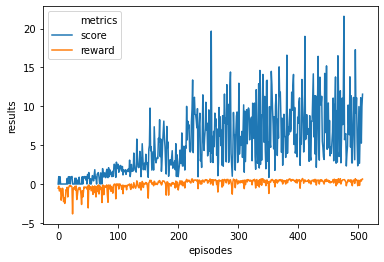

Max Train Score 42 Max Test Score 35
Mean Train Score 5.1435901494533365 Mean Test Score 7.96467843617926
----------------------------------------------------------------------------------------------------
Learning Rate 1e-05


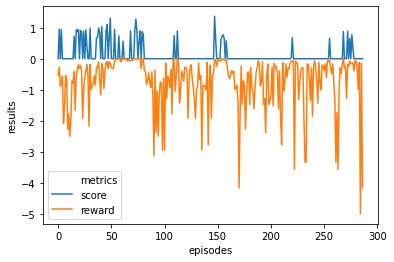

Max Train Score 3 Max Test Score 3
Mean Train Score 0.1385855604699526 Mean Test Score 0.12670209495349796
----------------------------------------------------------------------------------------------------


In [10]:
for lr, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Learning Rate", lr)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

# Best

In [15]:
results = {}
# enable_render=True turns on the display
snake_env = SnakeEnv(440, 440, enable_render=False)
env = make_vec_env(lambda: snake_env, n_envs=1)

model = DQN(MlpPolicy, env, verbose=1, learning_rate=0.0001, exploration_fraction=0.2, seed=42, learning_starts=1)
model.learn(total_timesteps=200000, log_interval=1000)

# Print rewards and scores for each episode
max_train_score = snake_env.record
mean_train_score = np.mean(np.array(snake_env.results['score']))
max_test_score, mean_test_score = evaluate(model)

results[0] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)

Using cpu device
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 216      |
|    ep_rew_mean      | 104      |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1000     |
|    fps              | 357      |
|    time_elapsed     | 394      |
|    total timesteps  | 141221   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.35     |
|    n_updates        | 35305    |
----------------------------------


Best Result


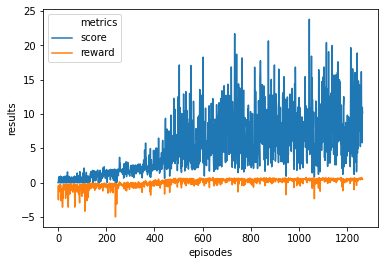

Max Train Score 43 Max Test Score 32
Mean Train Score 5.369304568297675 Mean Test Score 7.976719282733199
----------------------------------------------------------------------------------------------------


In [16]:
metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = results[0]

print("Best Result")
plot_metrics(metrics)    
print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
print("-"*100)